# Homework 2

**DUE NOV 11th at 11:59 PM**

You are expected to turn in a **pdf version** of this notebook with all your **codes, results, and figures** (Use the print option). Make sure the figures and results are visible as you want them to appear in the pdf before turning it in. Please do not modify the instructions as doing so will limit our ability to follow and grade your answers.

## Problem 1 (HW1 Problem 4)

In this problem, you will work on the clustering problem using Bottom-up Agglomerative clustering and K-mean clustering.

a) A 4-D dataset is given in **'iris.csv'** with the last column being the ground truth label. Load the file. Store the data in a variable ***X*** and store the label in a variable ***y***. Because clustering is an unsupervised task, there is no need for the labels during training.

In [63]:
import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_csv("iris.csv")
X = data.iloc[:,0:4]
y = data.iloc[:,4]

b) Train a clustering model using Bottom-up Agglomerative clustering.

In [64]:
from sklearn.cluster import AgglomerativeClustering
clf = AgglomerativeClustering(n_clusters = 3).fit(X)
labels = clf.labels_
X.columns=["row1", "row2", "row3", "row4"]

Visualize your clusters on a 2-D plot. Choose any 2 dimensions from the 4 dimensions to plot. Try to pick the 2 dimensions that best separate the data. Your plot should contains all the data points with points from the same predicted cluster haveing the same color. 

<AxesSubplot:xlabel='row1', ylabel='row4'>

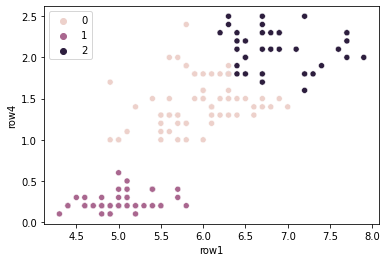

In [72]:
import seaborn as sns

sns.scatterplot(data=X, x="row1", y="row4", hue=labels, cmap='turbo')

Repeat the visualization step above using the same 2 dimensions. This time, plot according to the ground truth classes. Comment on the performance of your model.

Comment : 

The perforamnce of Bottom-up Agglomerative clustering appears to be decent from these graphs. When looking at features where the data is highly separated the model performes exceptionally well. However when the data is less separated it doesn't perform as well.

<AxesSubplot:xlabel='row1', ylabel='row4'>

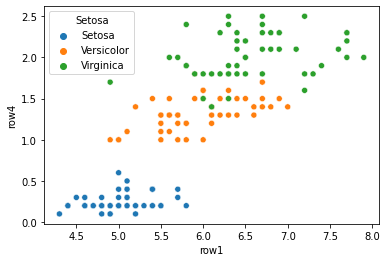

In [73]:
sns.scatterplot(data=X, x="row1", y="row4", hue=y, cmap='turbo')

c) Train a clustering model using K-mean clustering.

In [74]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
labels = kmeans.labels_


Visualize your clusters on a 2-D plot. Choose any 2 dimensions from the 4 dimensions to plot. Try to pick the 2 dimensions that best separate the data. Your plot should contains all the data points with points from the same predicted cluster haveing the same color.

<AxesSubplot:xlabel='row1', ylabel='row4'>

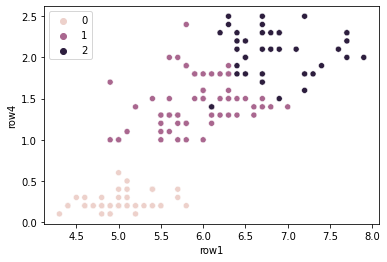

In [75]:
sns.scatterplot(data=X, x="row1", y="row4", hue=labels, cmap='turbo')

Repeat the visualization step above using the same 2 dimensions. This time, plot according to the ground truth classes. Comment on the performance of your model.

Comment:

This model appepears to perform as well as Bottom-up Agglomerative with a similar downfall of being unable to predict points that are not separated.

<AxesSubplot:xlabel='row1', ylabel='row4'>

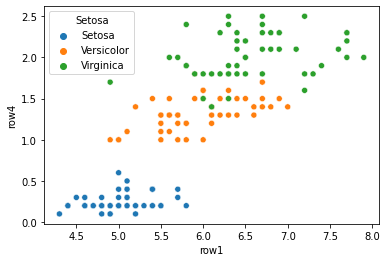

In [76]:
sns.scatterplot(data=X, x="row1", y="row4", hue=y, cmap='turbo')

d) Perform Principle Component Analysis (PCA) on the data. Project the original data on the 2 largest principle components. Store this new projected 2-D data in a variable ***X_projected***.

In [78]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X)
pca.explained_variance_ratio_

array([0.92395143, 0.05349142])

Repeat part **b** on the new 2-D data. Train the Bottom-up Agglomerative model and visualize your results.

<AxesSubplot:xlabel='row1', ylabel='row4'>

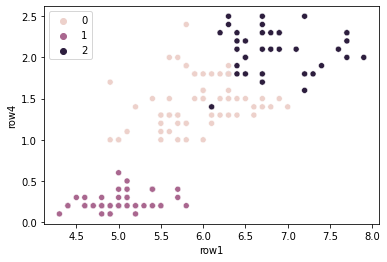

In [87]:
X_projected = pca.transform(X)

clf = AgglomerativeClustering(n_clusters = 3).fit(X_projected)
labels = clf.labels_


sns.scatterplot(data=X, x="row1", y="row4", hue=labels, cmap='turbo')


<AxesSubplot:xlabel='row1', ylabel='row4'>

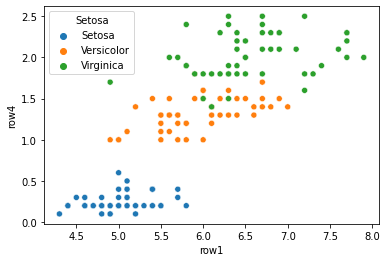

In [85]:
sns.scatterplot(data=X, x="row1", y="row4", hue=y, cmap='turbo')

Repeat part **c** on the new 2-D data. Train the K-means model and visualize your result.

<AxesSubplot:xlabel='row1', ylabel='row4'>

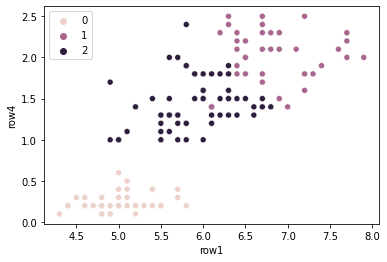

In [89]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(X_projected)
labels = kmeans.labels_

sns.scatterplot(data=X, x="row1", y="row4", hue=labels, cmap='turbo')


Compare the quality of 4-D and 2-D clusterings. When would the ideas of projection and dimensionality reduction be useful?

When used in combination with K means clustering dimension reduction was extreemly useful and helped our model increas its accuracy. However when used with Bottom-up Agglomerative clustering we do not see an improvment in results.

## Problem 2

In this problem, you will first implement the Naive Bayes (NB) algorithm from scratch. We will use a dataset for classifying if a patient has breast cancer. Each instance (row) in the dataset is a patient described by the 9 following features (with their corresponding values).

1. Clump Thickness: 1 - 10
2. Uniformity of Cell Size: 1 - 10
3. Uniformity of Cell Shape: 1 - 10
4. Marginal Adhesion: 1 - 10
5. Single Epithelial Cell Size: 1 - 10
6. Bare Nuclei: 1 - 10
7. Bland Chromatin: 1 - 10
8. Normal Nucleoli: 1 - 10
9. Mitoses: 1 - 10

Given these features, we will classify a car into one of the 2 classes: 0 (benign) or 1 (malignant).

NB is a very simple algorithm. Consider a feature **X**. For each value **$x_i$** of **X** and each class label **$y_j$**, NB calculates the value of $P(X = x_i | Y = y_j)$. For example, take the feature **Mitoses**, NB will calculate all the following values:

- P(Mitoses = 1 | Class = 0), P(Mitoses = 2 | Class = 0), P(Mitoses = 3 | Class = 0), ... , P(Mitoses = 10 | Class = 0)
- P(Mitoses = 1 | Class = 1), P(Mitoses = 2 | Class = 1), P(Mitoses = 3 | Class = 1), ... , P(Mitoses = 10 | Class = 1)

Repeat this calculation for all the features. In the end, NB keep a recording of all possible $P(X | Y)$. The calculation itself is intuitive:

$$
 P(X = x_i | Y = y_j) = \frac{\text{Number of rows with } X = x_i \text{ and } Y = y_j}{\text{Number of rows with } Y = y_j}
$$

In addition, NB also calculate the priors probability $P(Y = y_j)$. Again, intuitively:

$$
 P(Y = y_i) = \frac{\text{Number of rows with } Y = y_j}{\text{Number of rows in the dataset}}
$$

Given a test example $X_{test} = \{ X_0 = x_0, X_1 = x_1, \ldots, X_i = x_i\}$, for each class label $y_j$, NB calculate:

$$
\begin{align}
 P(Y = y_j | X_{test}) & = P(X_{test} | Y = y_j)P(Y = y_j) \\
                       & = P(X_0 = x_0 | Y = y_j)P(X_1 = x_1 | Y = y_j) \ldots P(X_i = x_i | Y = y_j)P(Y = y_j)
\end{align}
$$

Such calculation is easy since we have bookkept all $P(X | Y)$ and all $P(Y)$ in previous steps. The output of the model is simply:

$$
 \underset{y_j}{\operatorname{argmax}} P(Y = y_j | X_{test})
$$

You will do each of these steps following this problem. We will use Pandas to deal with the data in this problem. Pandas can do queries like "Get all the rows in which Clump Thickness = 2 and Class = 1" with minimal syntax.


a) First let's load the dataset and store it in a Pandas dataframe. Play with the dataframe and get used to the queries (this part is not graded). This guide is a good place to start:

https://medium.com/python-in-plain-english/filtering-rows-and-columns-in-pandas-python-techniques-you-must-know-6cdfc32c614c 

Split the dataset into a training set and a testing set. Use 10% of the data as the testing set (The splitting is graded).

In [117]:
import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_csv("breast-cancer-wisconsin.csv")
X = data.iloc[:,0:9]
y = data.iloc[:,9]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)


b) Now we will build up the bookkeeping. Let's start with the priors $P(Y = y_j)$, $y_j \in$ {0,1}. For each of these labels, calculate $P(Y = y_j)$ by simply counting the number of times $y_j$ appears in the dataset divided by the size of the dataset. You can bookkeep the priors in a dictionary with keys being $y_j$.

In [118]:
 tottal_size = y_train.size

 ones = y_train[y_train == 1]
 ones_size = ones.size
 ones_percent = ones_size/tottal_size

 zeros =  y_train[y_train == 0]
 zeros_size = zeros.size
 zeros_percent = zeros_size/tottal_size

d = {"y": [zeros_percent,ones_percent]}
dict_y = pd.DataFrame(data =d)

Now let's calculate the conditional probability $P(X = x_i | Y = y_j)$. If you do the query with Pandas, this counting should be simple. This time, store the conditional probability in another dictionary with keys ($x_i$, $y_j$) or any data structure that you prefer. 

In [119]:
import numpy as np

df1 = pd.DataFrame({"one":[]}) 
df2 = pd.DataFrame({"zero":[]}) 
ones_arr = []
zeros_arr = []
# make an array of all of all features 
features = X.columns
for a in features:
    for i in range (1,11):
        xiandyi_1 = X_train[(X_train[a] == i) &  (y_train ==1)]
        xiandyi_0 = X_train[(X_train[a] == i) &  (y_train ==0)]
        val_1 = xiandyi_1[a].size
        val_1 = val_1/ones_size
        val_0 = xiandyi_0[a].size
        val_0 = val_0/zeros_size
        ones_arr.append(val_1)
        zeros_arr.append(val_0)
#df2.append( xiandyi["Clump Thickness"].size/zeros_size)
ones_matrix = np.resize(ones_arr, [9,10])
ones_matrix_df  = pd.DataFrame(ones_matrix)
ones_matrix_df.index = ["Clump Thickness", " Uniformity of Cell Size", " Uniformity of Cell Shape", " Marginal Adhesion", " Single Epithelial Cell Size", " Bare Nuclei", " Bland Chromatin", " Normal Nucleoli", " Mitoses"]
ones_matrix_df.columns = [1,2,3,4,5,6,7,8,9,10]
print (ones_matrix_df)

zeros_matrix = np.resize(zeros_arr, [9,10])
zeros_matrix_df  = pd.DataFrame(zeros_matrix)
zeros_matrix_df.index = ["Clump Thickness", " Uniformity of Cell Size", " Uniformity of Cell Shape", " Marginal Adhesion", " Single Epithelial Cell Size", " Bare Nuclei", " Bland Chromatin", " Normal Nucleoli", " Mitoses"]
zeros_matrix_df.columns = [1,2,3,4,5,6,7,8,9,10]
print (zeros_matrix_df)


                                    1         2         3         4   \
Clump Thickness               0.013825  0.018433  0.055300  0.050691   
 Uniformity of Cell Size      0.018433  0.036866  0.105991  0.129032   
 Uniformity of Cell Shape     0.009217  0.032258  0.096774  0.124424   
 Marginal Adhesion            0.129032  0.092166  0.115207  0.115207   
 Single Epithelial Cell Size  0.004608  0.101382  0.175115  0.165899   
 Bare Nuclei                  0.069124  0.036866  0.059908  0.050691   
 Bland Chromatin              0.009217  0.032258  0.129032  0.138249   
 Normal Nucleoli              0.175115  0.023041  0.133641  0.073733   
 Mitoses                      0.557604  0.119816  0.115207  0.050691   

                                    5         6         7         8   \
Clump Thickness               0.175115  0.069124  0.092166  0.165899   
 Uniformity of Cell Size      0.119816  0.096774  0.078341  0.129032   
 Uniformity of Cell Shape     0.124424  0.101382  0.129032  0.1

That's it! You have successfully "trained" a NB model. Let's test our model on the test dataset.

Implement a **predict** function that returns $\underset{y_j}{\operatorname{argmax}} P(Y = y_j | X_{test})$ (refer to the description above). 

In [120]:
## itereate through the matrix of Xtest for each feature decide if 

results_arr = []
X_test= X_test.reset_index(drop=True)
features = X_test.columns

for a in range (0, 70):
    results_ones = 1
    results_zeros = 1
    for i in features:
        value = X_test.at[a,i]
        results_ones *= ones_matrix_df.at[i,value]
        results_zeros *= zeros_matrix_df.at[i,value]
    results_zeros *=  zeros_percent
    results_ones *=  ones_percent
    if (results_ones < results_zeros):
        results_arr.append(0) 
    if (results_ones > results_zeros):
        results_arr.append(1) 

Predict the label of all the instances in the test dataset, calculate and print out the accuracy.

In [56]:
res = len(set(results_arr) & set(y_test)) / float(len(set(results_arr) | set(y_test))) * 100
print("Percentage similarity between  : " + str(res)) 

Percentage similarity among lists is : 100.0


In [121]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, results_arr)


0.9857142857142858

## Problem 3

In this problem, you will implement the Logistic Regression (LR) algorithm from scratch. Similar to NB, LR relies on $P(Y|X)$ to predict the class of an example. However, unlike NB, a generative model, LR is a discriminative model so it does not need to estimate $P(X|Y)$ and $P(Y)$. LR assumes the form of the conditional probability $P(Y|X)$ to be:

$$
    P(Y | X) = f(X) = \frac{1}{1 + e^{-(\alpha X + \beta)}}
$$

$f(X)$ returns a value in (0,1). The model classifies $X$ as $1$ if $f(X)$ is closer to $1$ and $0$ otherwise. We have to estimate the model parameters: the vector $\alpha$ and $\beta$ from the data, which we will do via stochastic gradient descent (SGD). In SGD, a training example is shown to the model each at a time. The model makes a prediction on the training example and the error between the prediction and the ground-truth label is used to update the model's parameters. We use the log-likelihood loss to estimate the error in this problem. In particular, the log-likelihood loss for classifying the $X^{(i)}$ example with the ground-truth $y^{(i)}$ is: 

$$
    LL(y^{(i)},f(X^{(i)})) = -(y^{(i)} \log(f(X^{(i)})) + (1 - y^{(i)}) \log(1 - f(X^{(i)})))
$$

In our case, the updating is as the followings:

$$
\alpha_{j}(t+1) = \alpha_{j}(t) - \frac{\partial LL}{\partial \alpha_j} \times rate
$$

$$
\beta(t+1) = \beta(t) - \frac{\partial LL}{\partial \beta} \times rate
$$

where $rate$ is the how much change we want to make to the parameters in each update. Whenever we finish looping through all the instances in the dataset to update the parameters, we finish a training epoch. We may do many training epochs (looping through the dataset many times), until the model parameters converge.

First, we need to derive the formula for $\frac{\partial LL}{\partial \alpha_j}$ and $\frac{\partial LL}{\partial \beta}$. To keep the problem simple, these are provided to you:

$$
    \frac{\partial LL}{\partial \alpha_j} = -(y^{(i)} - f(X^{(i)}))X^{(i)}_{j}
$$

$$
    \frac{\partial LL}{\partial \beta} = -(y^{(i)} - f(X^{(i)}))
$$

a) We use the same dataset for predicting breast cancer in Problem 2 for this problem. Load the dataset and split it into a training set and a testing set.

In [97]:
import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_csv("breast-cancer-wisconsin.csv")
X = data.iloc[:,0:9]
y = data.iloc[:,9]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)
X_test= X_test.reset_index(drop=True)
X_train= X_train.reset_index(drop=True)
y_train= y_train.reset_index(drop=True)
y_test= y_test.reset_index(drop=True)

b) Learn the model parameters using SGD. A skeleton for SGD is provided to help you understand the process (You don't have to use the provided code). 

In [98]:
from math import exp

def calc_F(row, a_b):
    y_ = a_b[0]
    row_num = len(row)-1
    for i in range(row_num):
        y_ += a_b[i+1]*row[i]
    return 1 / (1 + np.exp(y_))

I fiddled with the ephochs until the accuracy increased 

In [106]:

epochs = 150
rate = 0.01

SGD_ = pd.concat([X_train, y_train], axis= 1).to_numpy()
a_b = [0.0 for i in range(len(SGD_[0]))]
for epoch in range(epochs):
    SUM_e = 0 
    for a in SGD_:
        y_ = calc_F(a, a_b)
        e_ = a[-1]-y_
        SUM_e += e_ ** 2
        a_b[0] = a_b[0] + rate * e_ * y_ * (1.0 -y_)

        for j in range(len(a)-1):
            a_b[j+1] = a_b[j+1]+ rate * e_ * y_ * (1.0 - y_)*a[j]
print (a_b)
    # for instance in traning dataset:
        # Update parameters

[-6.177872159322188, -0.24017980549452211, 1.6681436591542802, 0.8388486027072654, -0.024549231053325734, -2.167042247117568, 2.091343835813135, -0.5647327943896564, 0.7971388854242154, -1.1336196843924762]


In [107]:
results_arr = []


for i in range(0,70):
    row = X_test.loc[i]
    result = np.round(calc_F(row, a_b))
    if (result == 1):
        results_arr.append(0) 
    if (result == 0):
        results_arr.append(1) 
    
print(results_arr)

[0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0]


c) Load the testing dataset. Use $f(X)$ to predict the labels of the test instances. Calculate the accuracy.

In [108]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, results_arr)

print ("With an increase in ephohs and a decrease in the rate we see an increase in accuracy")

0.9857142857142858

## Problem 4

In this problem, you will investigate how the size of the training data on the performance of a generative model (NB) and a discriminative model (LR). **You are free to use scikit-learn's NB and LR.** 

a) Load the breast cancer training dataset and split it into a training set and a testing set. 

In [109]:
import pandas as pd

from sklearn.model_selection import train_test_split
X_test= X_test.reset_index(drop=True)
data = pd.read_csv("breast-cancer-wisconsin.csv")
X = data.iloc[:,0:9]
y = data.iloc[:,9]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

b) We will train NB classifiers that use only a portion of the training data. Let's vary this portion from 1% to 100% of the training set (100 iterations). For each portion value, sample the training set according to the portion, train a NB classifer on this portion of the training set, and evaluate the model accuracy on the testing set.  

In [116]:
import numpy as np 
from sklearn.naive_bayes import MultinomialNB
percents = np.linspace(.01, 1,100)
size = len(X_train)
X_train_new= X_train.reset_index(drop=True)
print (size)
for i in percents:
    slice_ = np.round(i*size)-1
    new_X_train = X_train_new.loc[0:slice_,:]
    print(len(new_X_train))

629
6
13
19
25
31
38
44
50
57
63
69
75
82
88
94
101
107
113
120
126
132
138
145
151
157
164
170
176
182
189
195
201
208
214
220
226
233
239
245
252
258
264
270
277
283
289
296
302
308
314
321
327
333
340
346
352
359
365
371
377
384
390
396
403
409
415
421
428
434
440
447
453
459
465
472
478
484
491
497
503
509
516
522
528
535
541
547
554
560
566
572
579
585
591
598
604
610
616
623
629


Plot the accuracies of the models versus the portion of the training set used. Comment on the effect of increasing the size of the training dataset on the performance of NB.

c) Repeat part **b** with LR.

In [ ]:
from sklearn.linear_model import LogisticRegression

Between a generative model (NB) and a discriminative model (LR), which is more affected by small training dataset? Think about a reason for this.

## Problem 5

What is the hyperparameters, the parameters, and the objective function for finding the best hypothesis for each of the following methods:

1. Decision Tree (Entropy gain)
2. Support Vector Machine
3. K-nearest Neighbors Clustering

## Decision Tree
When working with decision trees some of the most important hyperparameters are the max depth and the min samples split as it really affects how much our model over fits or underfits to the data. 